<a href="https://colab.research.google.com/github/hadiidfajri/Big-Data/blob/main/EDA_Product_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Library

In [1]:
pip install pandas numpy scikit-learn category_encoders matplotlib seaborn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data (using pandas)

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

100%|██████████| 147M/147M [00:05<00:00, 27.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nadyinky/sephora-products-and-skincare-reviews/versions/2


In [4]:
import os

# List files in the downloaded directory
file_list = os.listdir(path)
print("Files in the downloaded directory:", file_list)

# Filter for review CSV files
review_files = [f for f in file_list if f.startswith('reviews_') and f.endswith('.csv')]

if review_files:
    # Read and concatenate all review files
    df_list = []
    for filename in review_files:
        csv_filepath = os.path.join(path, filename)
        df_list.append(pd.read_csv(csv_filepath))
    df = pd.concat(df_list, ignore_index=True)
    display(df.head()) # Display the head of the dataframe to confirm it's loaded
    print(f"Loaded {len(df_list)} review files and concatenated them into a DataFrame with {len(df)} rows.")
else:
    print("No review CSV files found in the downloaded directory.")
    df = None # Set df to None if no review CSV is found

Files in the downloaded directory: ['reviews_0-250.csv', 'reviews_750-1250.csv', 'reviews_1250-end.csv', 'reviews_250-500.csv', 'reviews_500-750.csv', 'product_info.csv']


/tmp/ipython-input-39103883.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(csv_filepath))
/tmp/ipython-input-39103883.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(csv_filepath))
/tmp/ipython-input-39103883.py:15: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(csv_filepath))


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


Loaded 5 review files and concatenated them into a DataFrame with 1094411 rows.


# Preprocessing Data


In [5]:
df

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094406,116257,7549964033,3,0.0,1.0,2,0,2,2022-11-24,"Cute packaging, innovative component. The prod...",Can live without it,NaN,brown,oily,NaN,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
1094407,116258,22017857232,5,1.0,1.0,1,0,1,2022-11-24,"I am obsessed with this intensive lip mask, do...",Loveeee!,fair,brown,dry,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
1094408,116259,30329641422,5,1.0,NaN,0,0,0,2022-11-24,After using this product from a free sample pr...,Best Lip Mask Ever!,lightMedium,blue,normal,blonde,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0
1094409,116260,34099439981,5,1.0,NaN,0,0,0,2022-11-24,Plum and plush my lips are. These don’t necess...,Plush pudding makes me lips look so smooth,NaN,brown,combination,black,P503692,Plush Puddin’ Intensive Recovery Lip Mask With...,Fenty Skin,22.0


# Get to know the data

## All about the data (Data Type)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

Data DIstribution (Numerical and categorical)

In [7]:
numerical_col = df.select_dtypes(exclude='object')
categorical_col = df.select_dtypes(exclude='number')

## Duplicated,null,missing value,and shape

In [8]:
print("Total of Duplicated data : ",df.duplicated().sum())
print("\n\nTotal of Null data       :\n",df.isnull().sum())
print("\n\nTotal of Missing data    :\n",df.isna().sum())
print("\n\nData Shape               : ",df .shape)

Total of Duplicated data :  0


Total of Null data       :
 Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_count         0
total_pos_feedback_count         0
submission_time                  0
review_text                   1444
review_title                310654
skin_tone                   170539
eye_color                   209628
skin_type                   111557
hair_color                  226768
product_id                       0
product_name                     0
brand_name                       0
price_usd                        0
dtype: int64


Total of Missing data    :
 Unnamed: 0                       0
author_id                        0
rating                           0
is_recommended              167988
helpfulness                 561592
total_feedback_count             0
total_neg_feedback_cou

Using imputation for missing and null data

In [9]:
modus_isrecommended=df["is_recommended"].mode()[0]
df['is_recommended']=df['is_recommended'].fillna(modus_isrecommended)

In [10]:
df['helpfulness']=df['helpfulness'].fillna(0)

In [11]:
columns_to_impute_mode = ["skin_type","hair_color","eye_color","skin_tone"]

for column in columns_to_impute_mode :
  mode_value=df[column].mode()[0]
  df[column]=df[column].fillna(mode_value)
  print(f"Missing values in {column} : {df[column].isnull().sum()}")



Missing values in skin_type : 0
Missing values in hair_color : 0
Missing values in eye_color : 0
Missing values in skin_tone : 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            1094411 non-null  float64
 4   helpfulness               1094411 non-null  float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 1094411 non-null  object 
 12  eye_color                 1094411 non-null  object 
 13  skin_type                 1

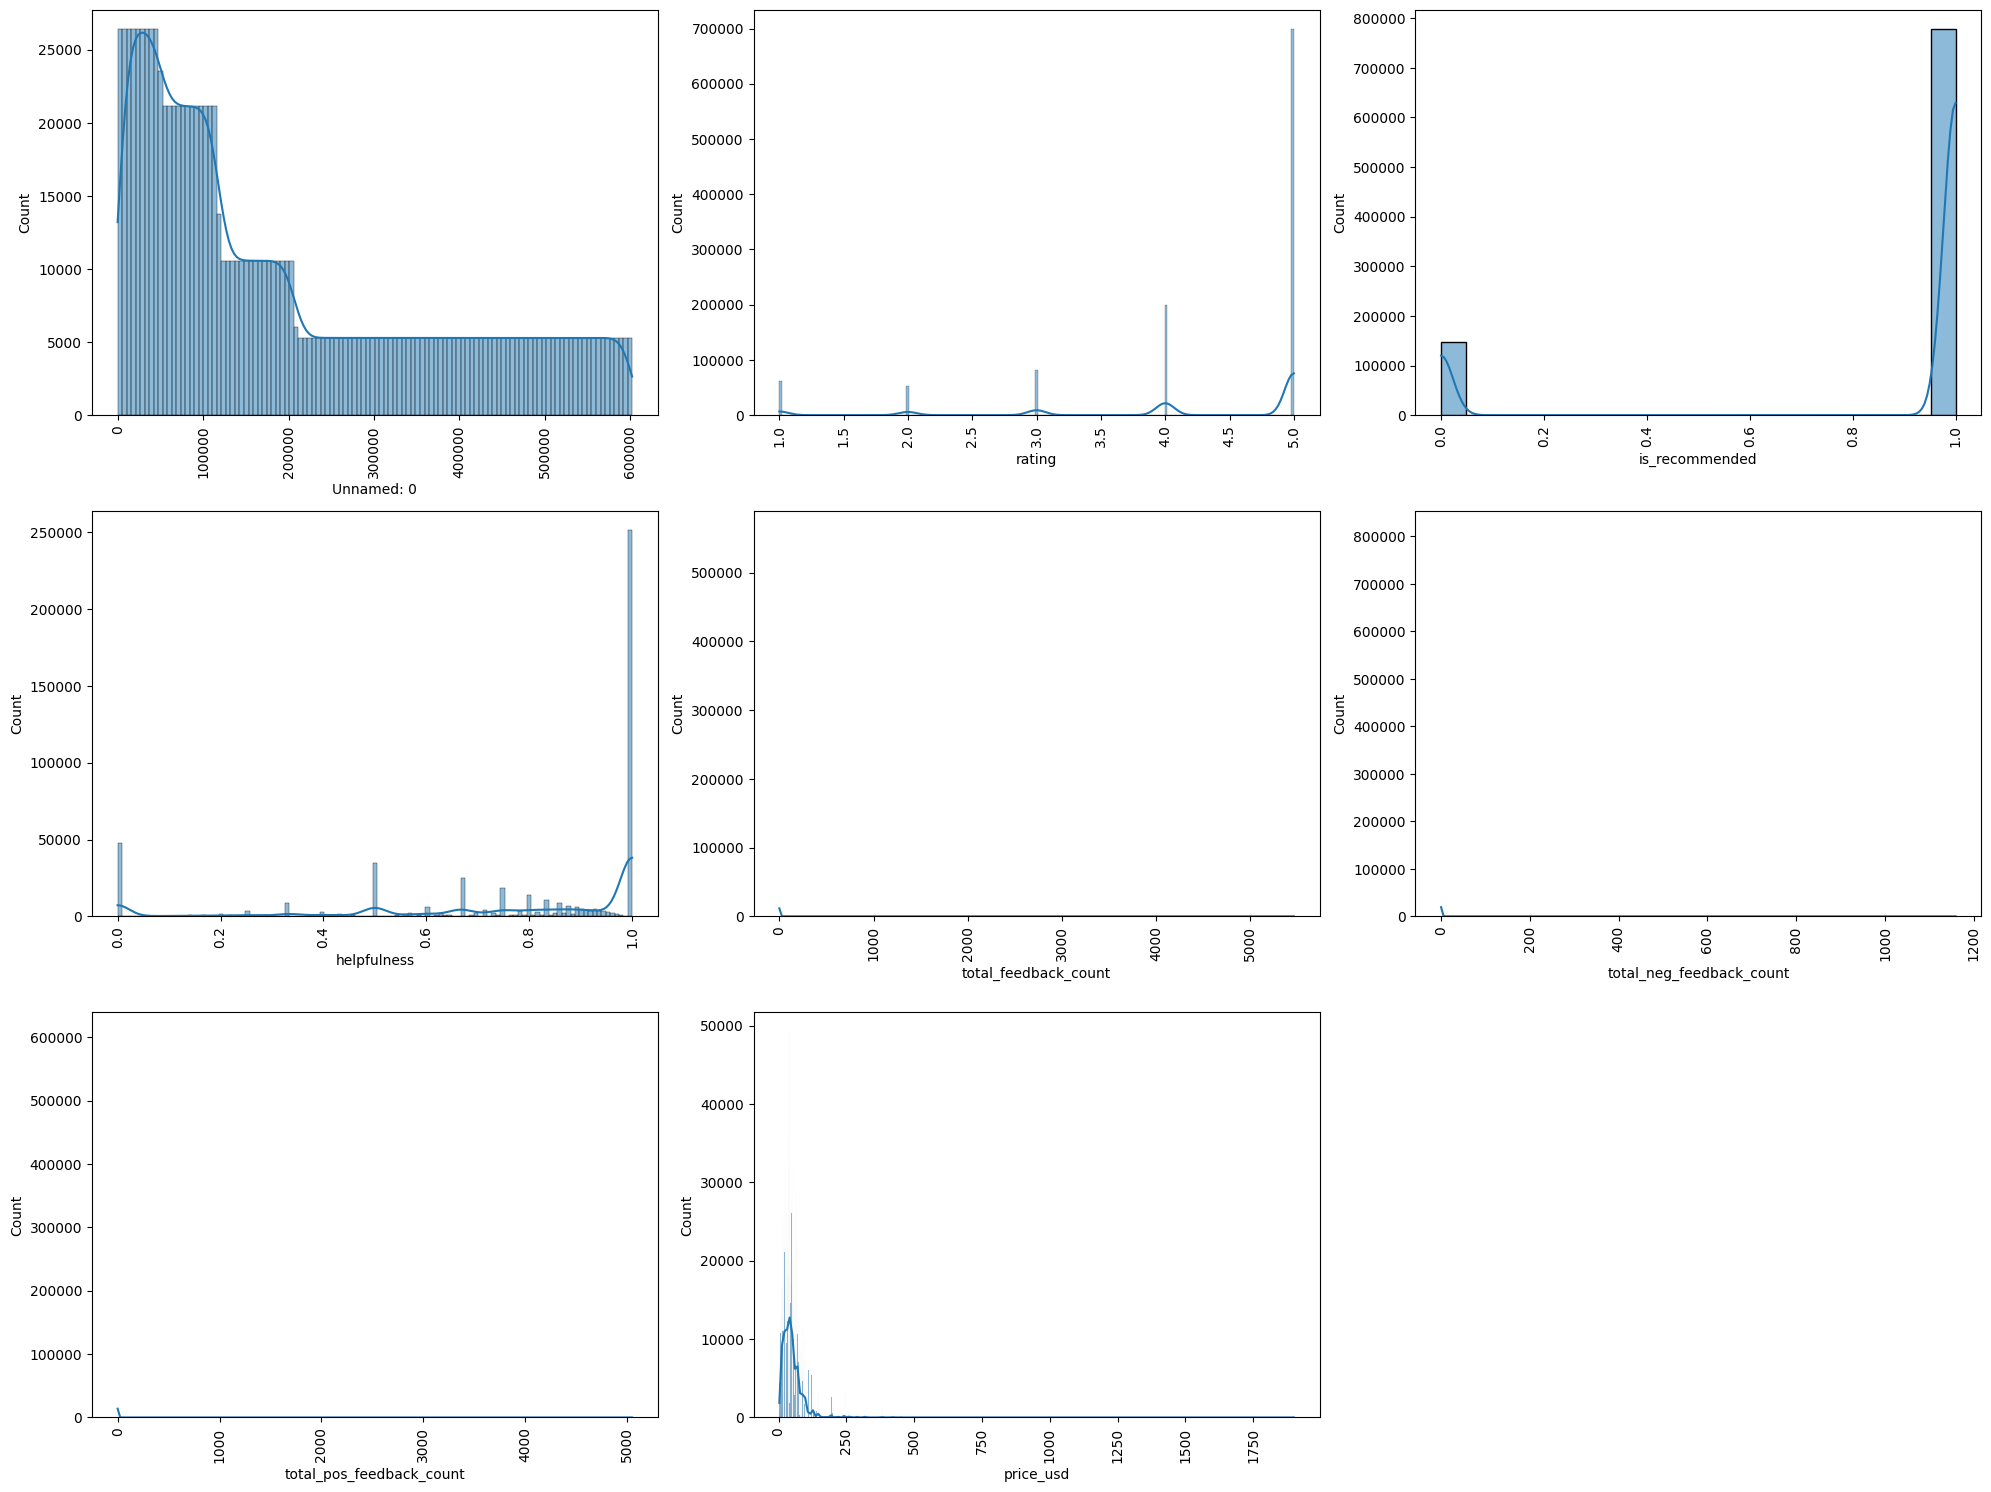

In [13]:
plt.figure(figsize=(20, 15))
num_cols = len(numerical_col.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(numerical_col.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=numerical_col, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

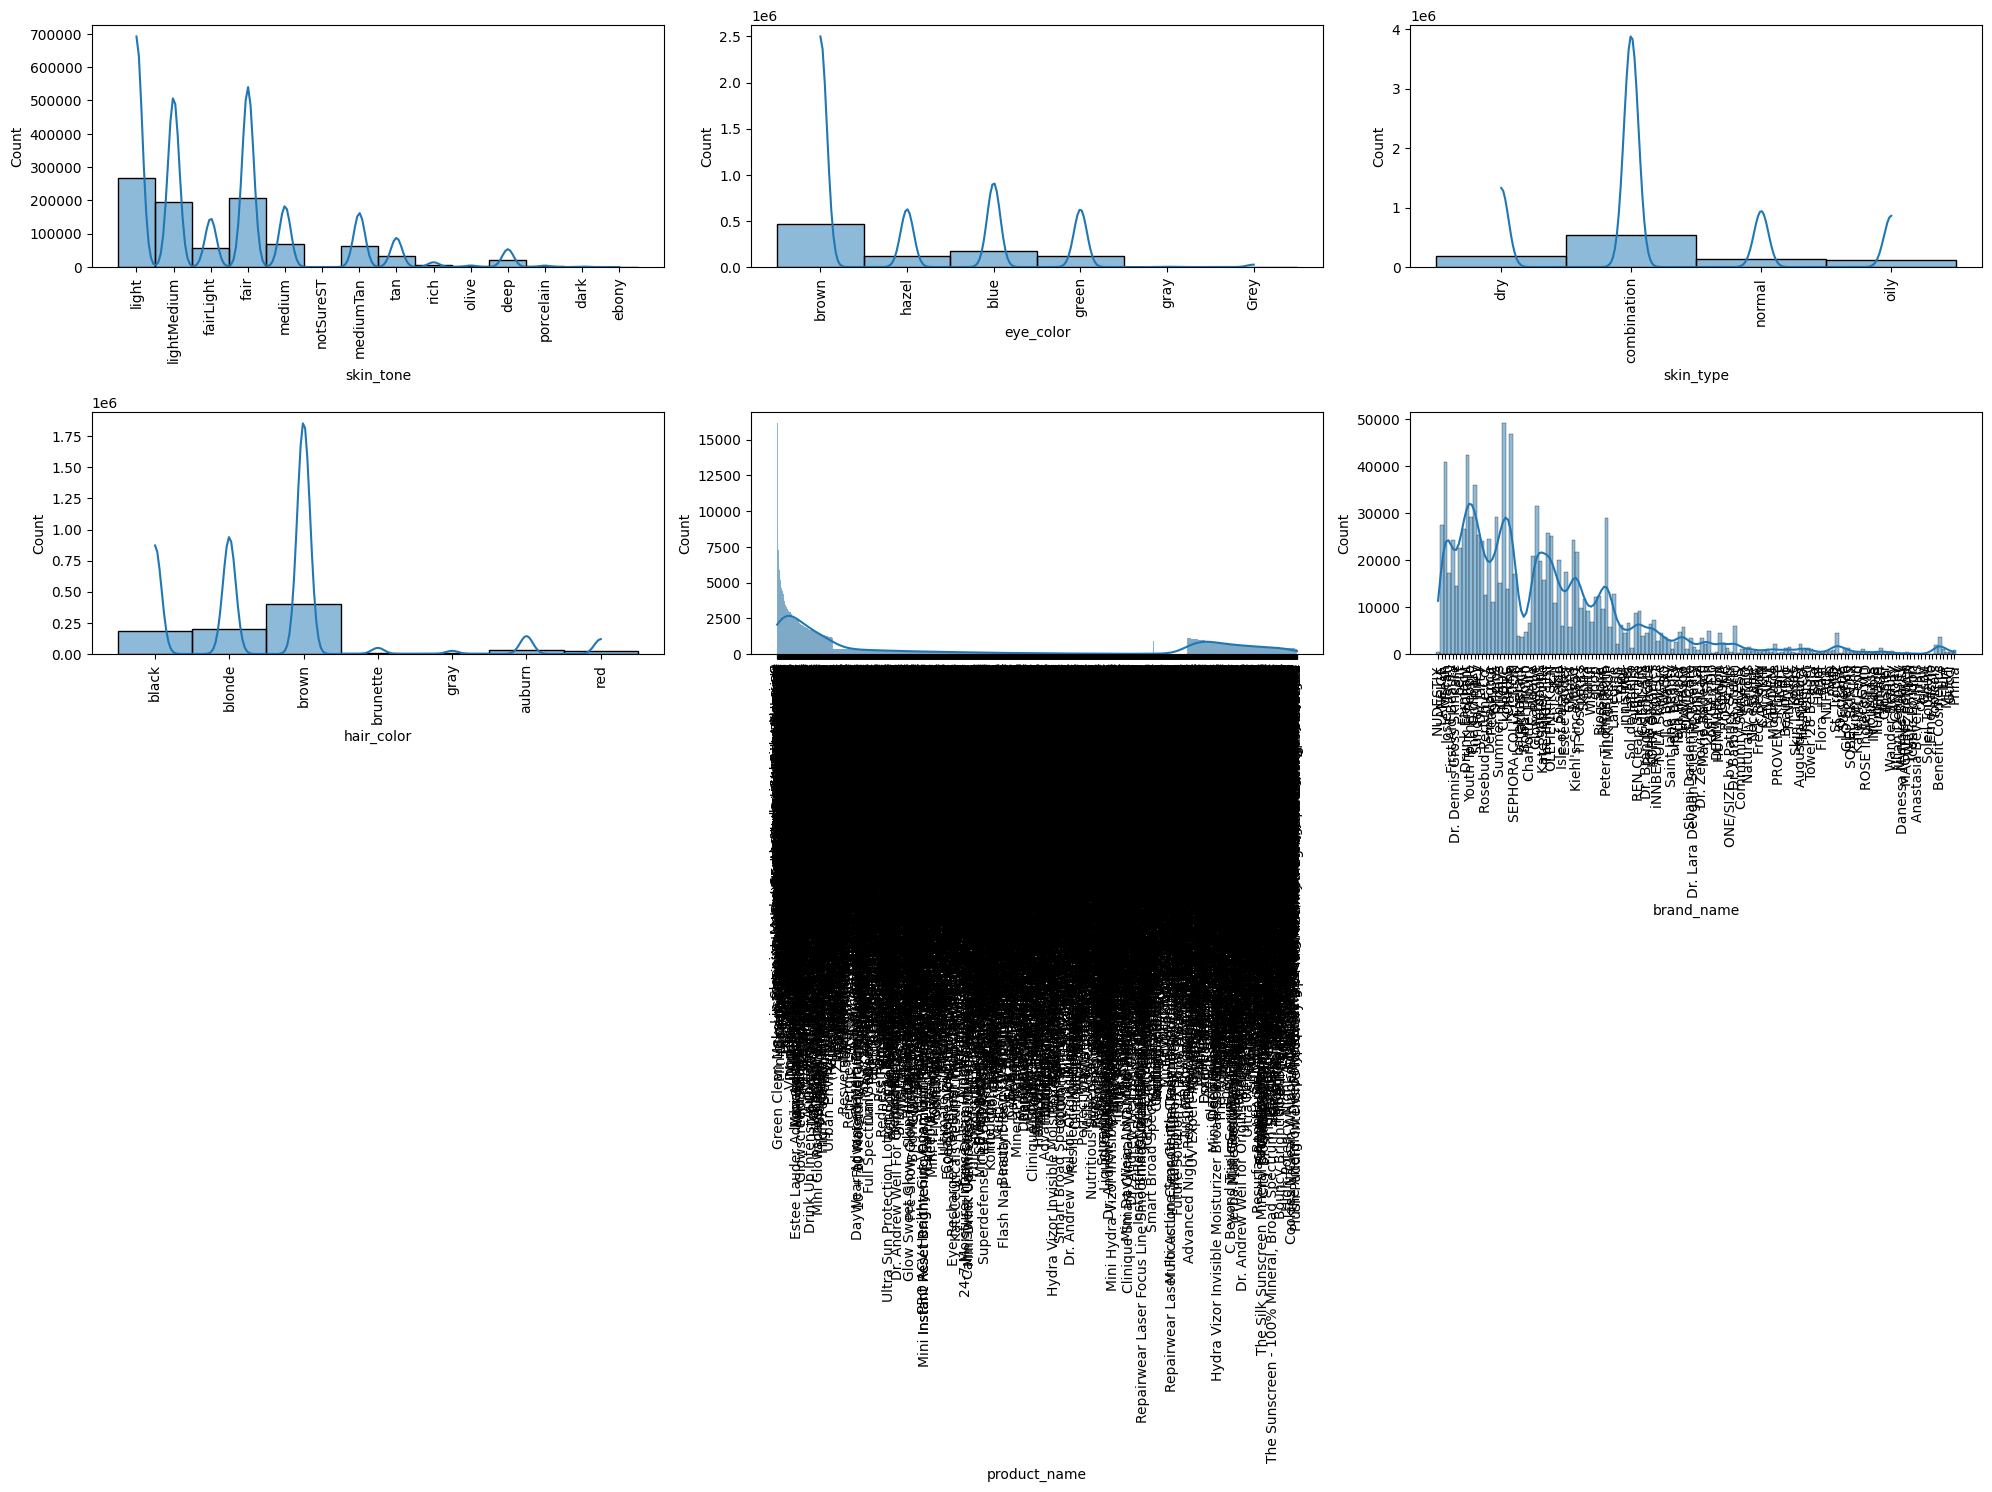

In [14]:
plt.figure(figsize=(20, 15))
# Exclude columns that are not suitable for histogram plots
categorical_cols_to_plot = categorical_col.drop(columns=['author_id', 'submission_time', 'review_text', 'review_title','product_id'])
num_cols = len(categorical_cols_to_plot.columns)
rows = (num_cols + 2) // 3  # Calculate the number of rows needed
for index, column in enumerate(categorical_cols_to_plot.columns):
    plt.subplot(rows, 3, index + 1)
    sns.histplot(data=categorical_cols_to_plot, x=column, kde=True)
    plt.xticks(rotation=90)
plt.tight_layout(pad=1.0)
plt.show()

## Data Numerical Summary

In [15]:
df.describe()

,Unnamed: 0,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06,1.094411e+06
mean,1.989864e+05,4.299158e+00,8.645271e-01,3.737984e-01,4.177126e+00,8.948695e-01,3.282257e+00,4.900838e+01
std,1.749886e+05,1.149444e+00,3.422281e-01,4.429952e-01,2.271524e+01,5.288943e+00,1.967482e+01,4.004338e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,5.590600e+04,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01
50%,1.308240e+05,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01
75%,3.285265e+05,5.000000e+00,1.000000e+00,9.130430e-01,3.000000e+00,1.000000e+00,3.000000e+00,6.200000e+01
max,6.021290e+05,5.000000e+00,1.000000e+00,1.000000e+00,5.464000e+03,1.159000e+03,5.050000e+03,1.900000e+03


In [16]:
df.nunique()

,0
Unnamed: 0,602130
author_id,578653
rating,5
is_recommended,2
helpfulness,3767
total_feedback_count,676
total_neg_feedback_count,259
total_pos_feedback_count,590
submission_time,5317
review_text,969419


# Data Visualization


# How

Bagaimana pola feedback (total positive dan negative feedback) sepanjang tahun 2020–2023 membantu mengidentifikasi bagaimana karakteristik ulasan yang paling berpengaruh terhadap meningkatnya nilai helpfulness pengguna?

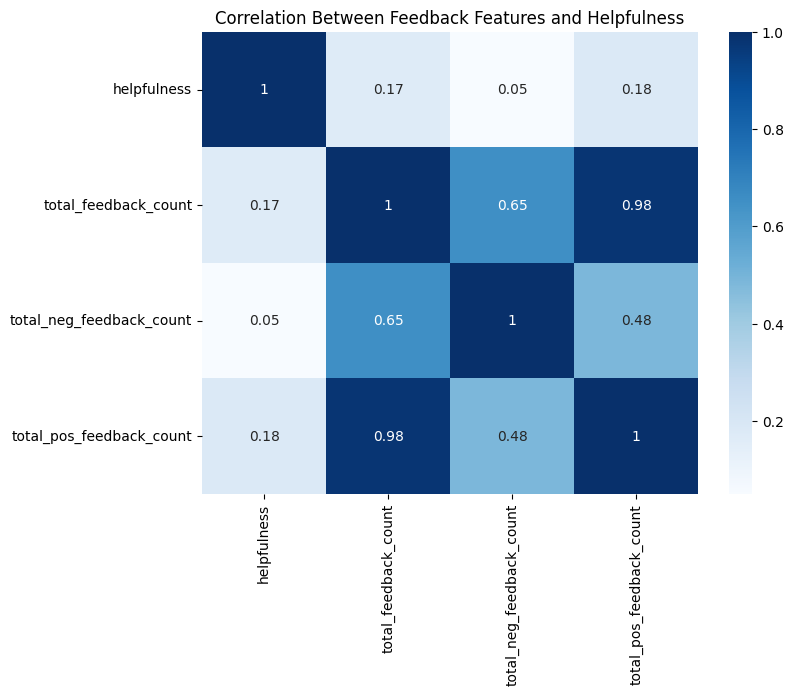

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Feedback Features and Helpfulness")
plt.show()


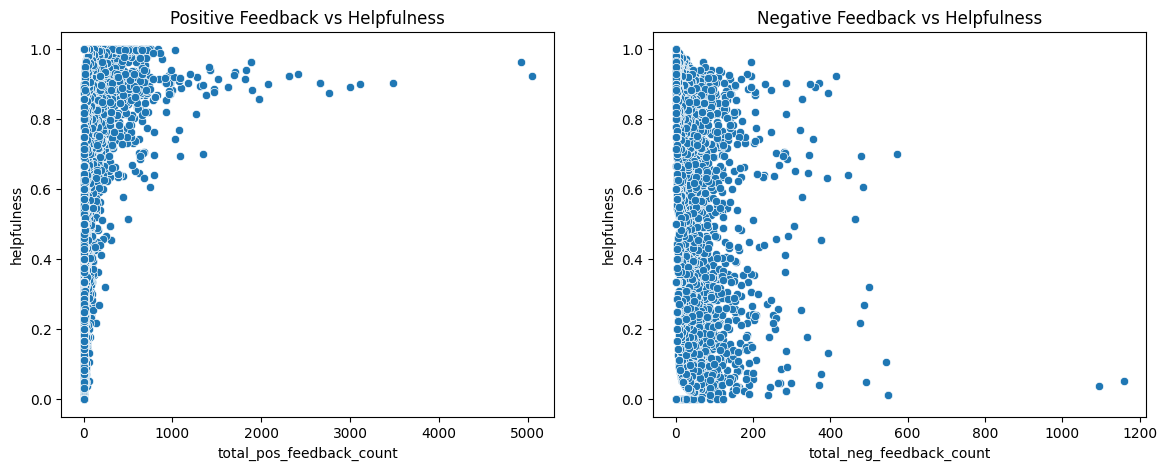

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(x='total_pos_feedback_count', y='helpfulness', data=df, ax=axes[0])
axes[0].set_title("Positive Feedback vs Helpfulness")

sns.scatterplot(x='total_neg_feedback_count', y='helpfulness', data=df, ax=axes[1])
axes[1].set_title("Negative Feedback vs Helpfulness")

plt.show()


#What

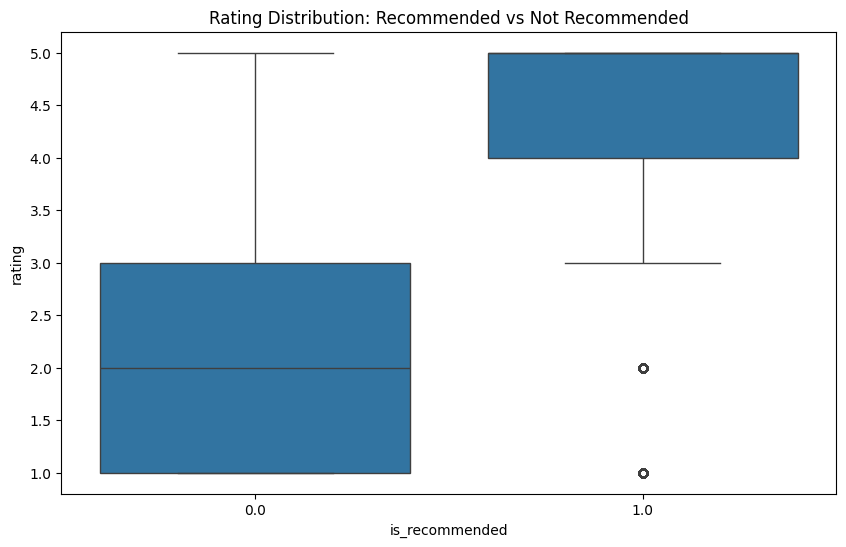

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_recommended', y='rating', data=df)
plt.title("Rating Distribution: Recommended vs Not Recommended")
plt.show()


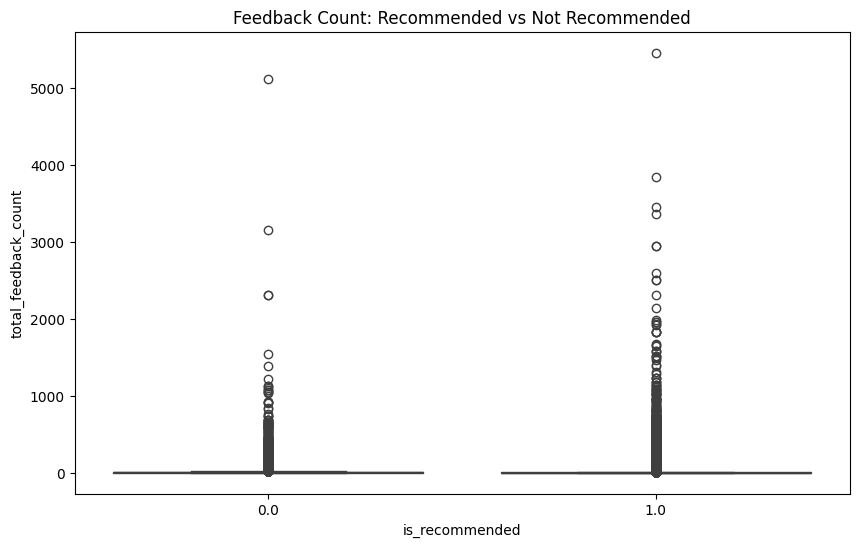

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='is_recommended', y='total_feedback_count', data=df)
plt.title("Feedback Count: Recommended vs Not Recommended")
plt.show()


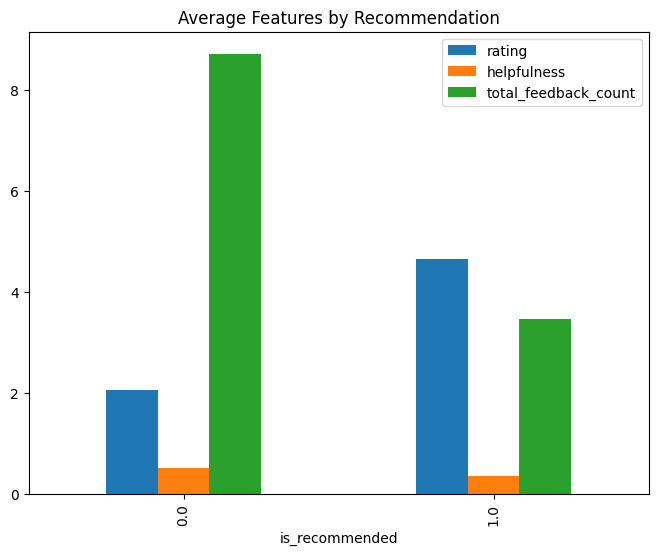

In [21]:
df_group = df.groupby('is_recommended')[['rating','helpfulness','total_feedback_count']].mean()

df_group.plot(kind='bar', figsize=(8,6))
plt.title("Average Features by Recommendation")
plt.xlabel("is_recommended")
plt.show()


#Why

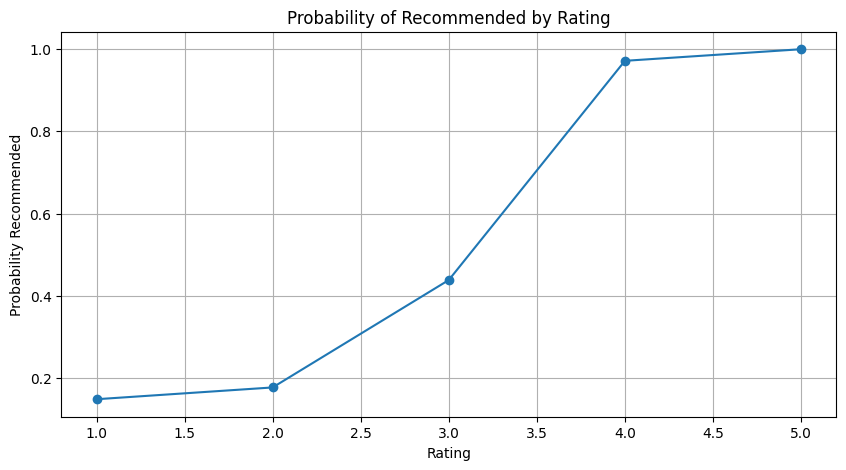

In [22]:
import numpy as np

prob_rating = df.groupby('rating')['is_recommended'].mean()

plt.figure(figsize=(10,5))
plt.plot(prob_rating.index, prob_rating.values, marker='o')
plt.title("Probability of Recommended by Rating")
plt.xlabel("Rating")
plt.ylabel("Probability Recommended")
plt.grid(True)
plt.show()


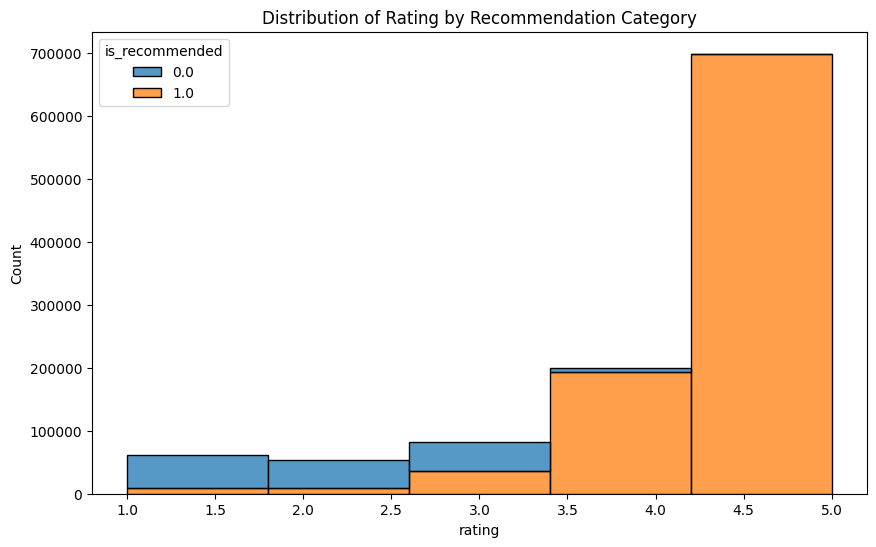

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='rating', hue='is_recommended', multiple='stack', bins=5)
plt.title("Distribution of Rating by Recommendation Category")
plt.show()
